# Project Goals

Attempt to identify the relationship (if any) between gross domestic product (GDP) & life expectancy in range of countries.

First we import needed modules and load the data.
Next we explore and explain data.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('E:\\Semo4ka\\Python\\CodeCademy\\life_expectancy\\all_data.csv')
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


In [4]:
print(df.describe())

              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.880499e+12
std       4.633971                         10.672882  5.197561e+12
min    2000.000000                         44.300000  4.415703e+09
25%    2003.750000                         74.475000  1.733018e+11
50%    2007.500000                         76.750000  1.280220e+12
75%    2011.250000                         78.900000  4.067510e+12
max    2015.000000                         81.000000  1.810000e+13


In [5]:
print('Countries represented: ', df.Country.unique())

Countries represented:  ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


**Insights:**
- dataset we are working with contains data in 2000-2015 year range,
- life expectancy at bith varies from 44 to 81 years, with average of 73 years, 
- data represents 6 countries.



## **Questions we answer next are:**

**Has life expectancy increased over time in the six nations?**

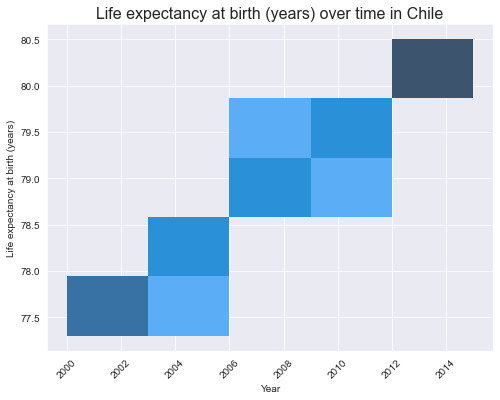

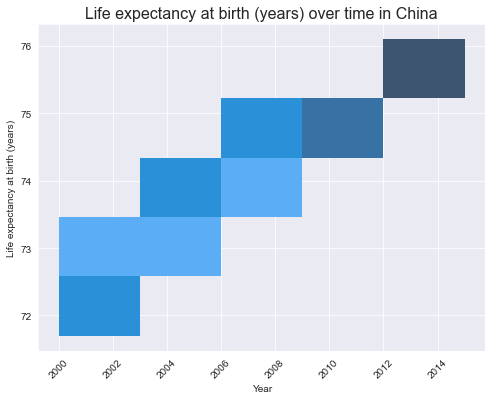

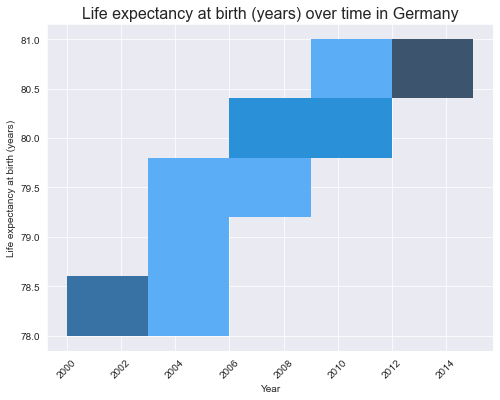

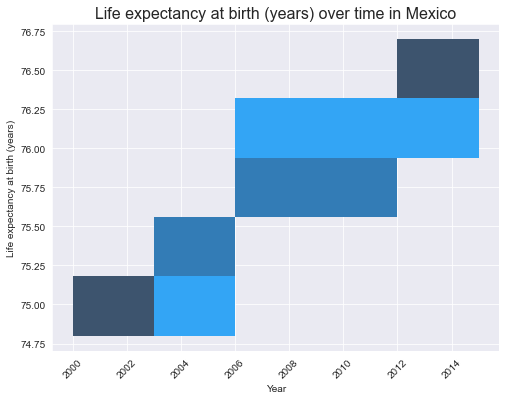

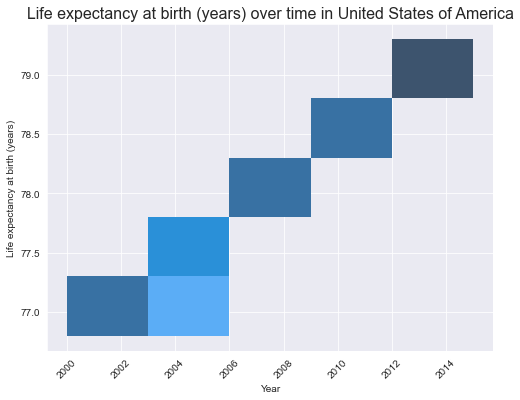

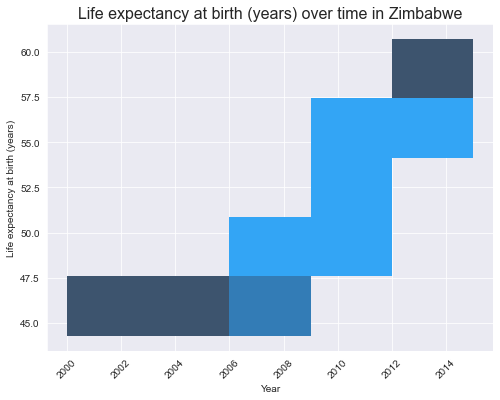

In [6]:
def hist_plot(df, country, column):
    plt.figure(figsize=(8,6))
    sns.set_style('darkgrid')
    sns.histplot(x=df['Year'][df.Country == country], y=df[column][df.Country == country])
    plt.title('{} over time in {}'.format(column, country), fontsize=16)
    plt.xticks(rotation = 45)
    plt.show()
    
for country in df.Country.unique():
    hist_plot(df, country, 'Life expectancy at birth (years)')

Life expectancy increased over time in all countries. In Zimbabwe  life expectancy at birth was not growing from 2000 to 2006 years, but after started increasing fast, while still keeping this country on the lowest life expectany level. Highest value is in Germany, with Chile and Mexico folowing close behind.

**Has GDP increased over time in the six nations?**

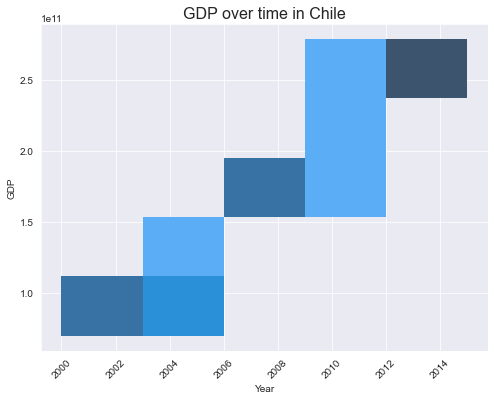

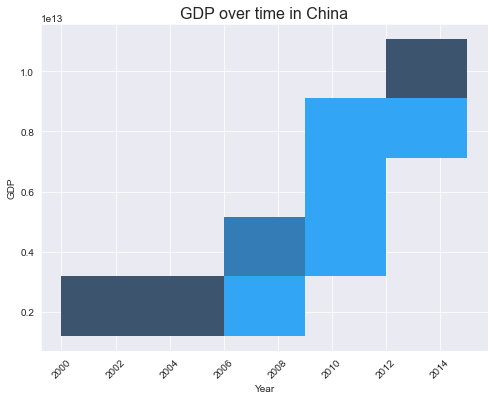

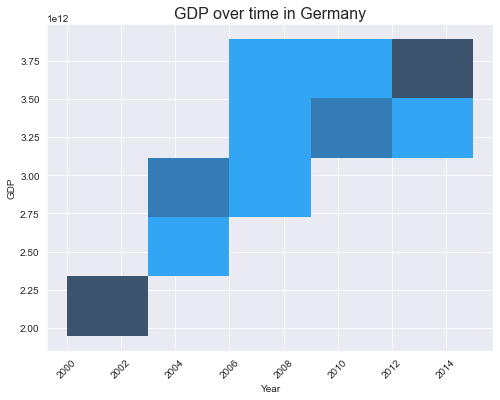

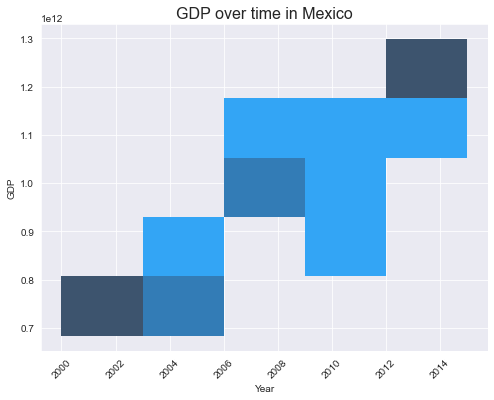

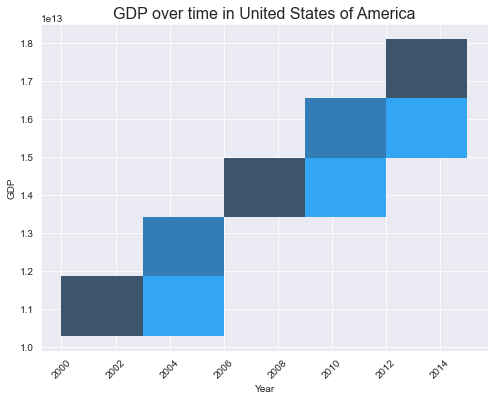

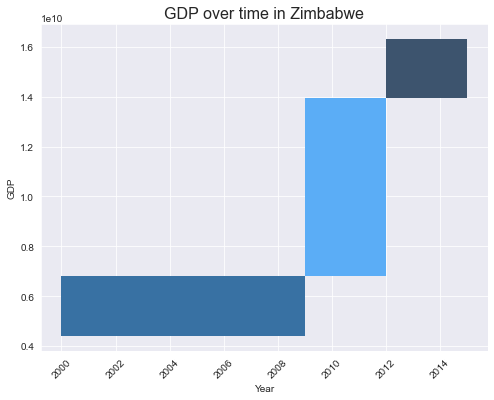

In [7]:
for country in df.Country.unique():
    hist_plot(df, country, 'GDP')

GDP level increased over time in all countries. In Zimbabwe GDP was not growing from 2000 to 2009 years, but after more than doubled. Another country with no grow until 2006 year is China, with follow of great increase in next years, while still having lowest GDP among others. Highest value of GDP is in Germany, whith countries lowest level of GDP being still much higher, than highest values in most of other countries in the dataset.

**Is there a correlation between GDP and life expectancy of a country?**

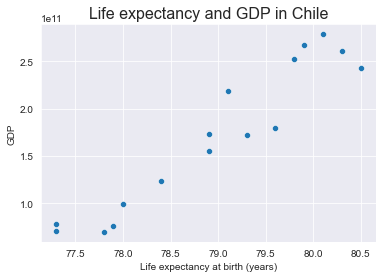

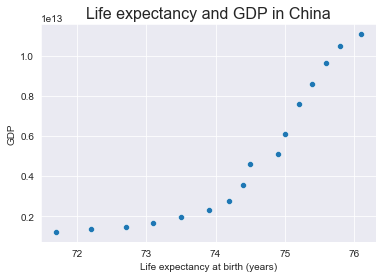

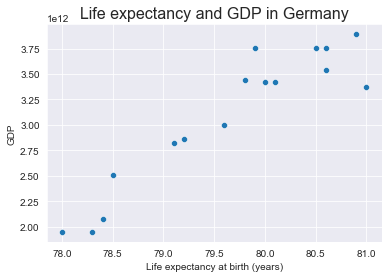

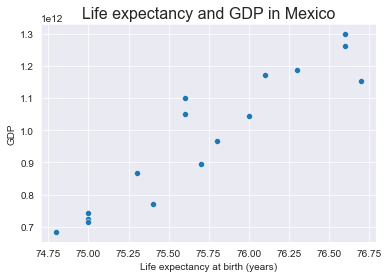

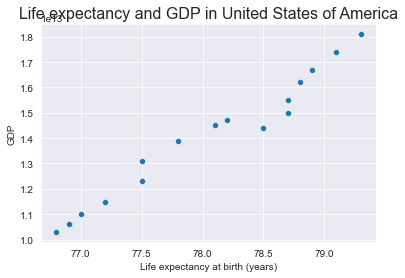

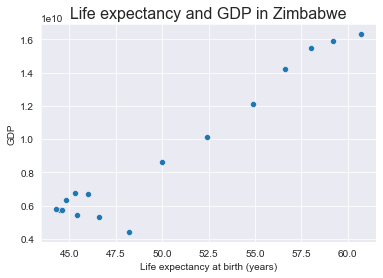

In [11]:
def scatter_plot(df, country):
    sns.set_style('darkgrid')
    sns.scatterplot(x=df['Life expectancy at birth (years)'][df.Country == country], y=df['GDP'][df.Country == country])
    plt.title('Life expectancy and GDP in {}'.format(country), fontsize=16)
    plt.show()
    
    
for country in df.Country.unique():
    scatter_plot(df, country)
    

We can see correlation between GDP and life expectancy in every country.

**What is the average life expectancy in these nations?**

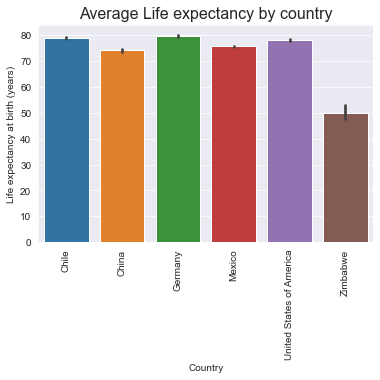

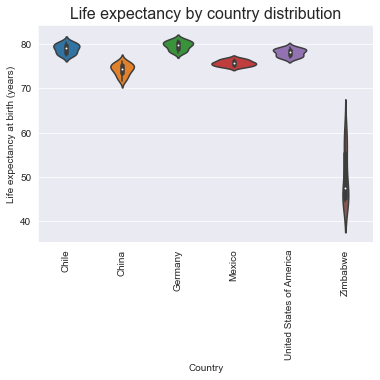

In [12]:
sns.set_style('darkgrid')
ax1 = plt.subplot()
sns.barplot(data = df, x = 'Country', y = 'Life expectancy at birth (years)')
plt.title('Average Life expectancy by country', fontsize=16)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 90)
plt.show()
plt.clf()

ax2 = plt.subplot()
sns.violinplot(data = df, x= 'Country', y = 'Life expectancy at birth (years)')
plt.title('Life expectancy by country distribution', fontsize=16)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 90)
plt.show()

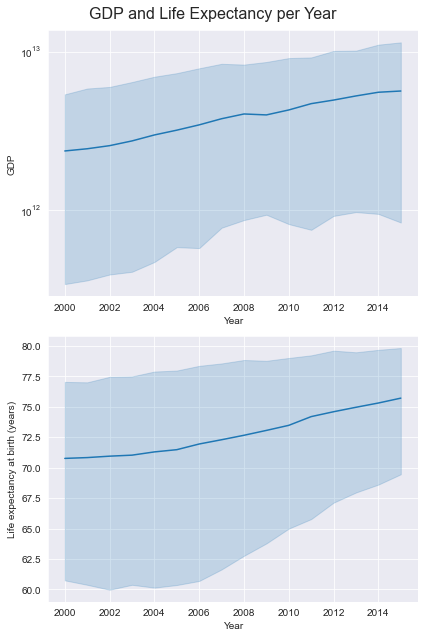

In [25]:
fig, (ax1, ax2)  = plt.subplots(2, figsize=(6,9))
plt.suptitle('GDP and Life Expectancy per Year', fontsize=16)
sns.set_style('darkgrid')
sns.lineplot(ax=ax1, data=df, y='GDP', x='Year')
ax1.set_yscale('log')
sns.lineplot(ax=ax2, data=df, y='Life expectancy at birth (years)', x='Year')
plt.tight_layout()
plt.show()

*Distribution of Life expectancy by country:*

First graph represents average Life Expectancy by country, with Germany having highest value and Zimbabwe smalest.

Second gragh represents the distribution of Life Expectancy going from 2000 until 2015 separated by country. Life Expectancy in the majority of the contries in this research showed a average range between 70 and 80 years in these group. An exception with problematic lower numbers, is Zimbabwe going from 46 to 60.

Last lineplot shows average GDP and Life expectancy by Year distribution, with mean line and range of values by the year. In general, there is marginal increase in Life Expectancy over time. The outliers in Life Expectancy increases dramatically following year 2006. This is likely the Zimbabwe data as shown previous graphs.

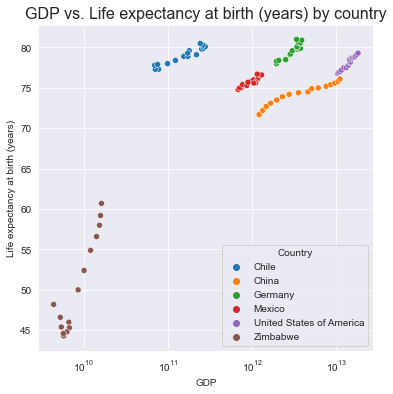

In [29]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df, x='GDP', y='Life expectancy at birth (years)', hue='Country')
plt.title('GDP vs. Life expectancy at birth (years) by country', fontsize=16)
plt.xscale('log')
plt.show()

For most countries, there was a clear linear relationship between GDP and Life Expectancy.

Zimbabwe has a far steeper incline than other countries, although with a significantly lower GDP and Life Expectancy than other countries at all datapoints


**What is the average GDP in these nations?**

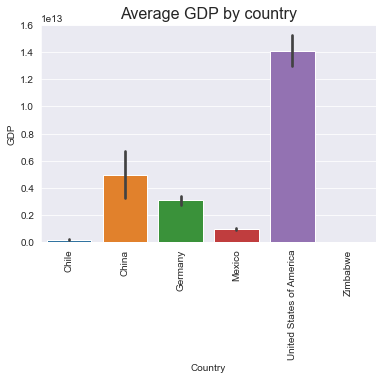

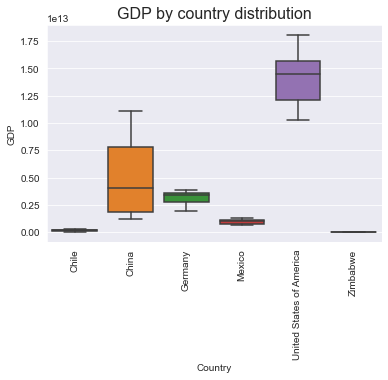

In [13]:
sns.set_style('darkgrid')
ax1 = plt.subplot()
sns.barplot(data = df, x = 'Country', y = 'GDP')
plt.title('Average GDP by country', fontsize=16)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 90)
plt.show()
plt.clf()

ax2 = plt.subplot()
sns.boxplot(data = df, x= 'Country', y = 'GDP')
plt.title('GDP by country distribution', fontsize=16)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 90)
plt.show()

Growth levels of GDP in China and USA are outstanding while Chile, Mexico and especially Zimbabwe seem to keep their levels quite the same over the years.

## Conclusions

Crossing over these GDP and Life Expectancy help us understand improvements, economical and social, in countries such as China and USA and provides a glimpse of hope in developing countries such as Zimbabwe. 

To go forward and deepen the impact of the economical and social changes in the population it is required to collect more information and open it up to see if efectively growth in both terms are improving quality of life, which should be the ultimate goal of all goverments in the long term.